In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
%matplotlib inline

# Small-World Networks

## Let's reproduce Fig 1 of the article

In [2]:
G_s=nx.watts_strogatz_graph(20,4,0)

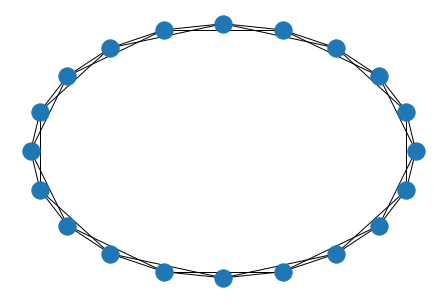

In [3]:
nx.draw_circular(G_s)

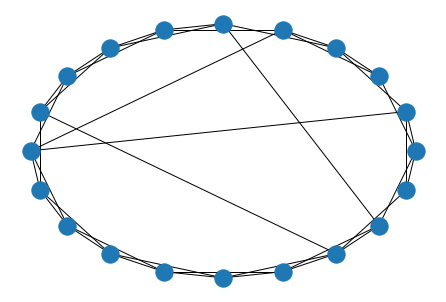

In [4]:
nx.draw_circular(nx.watts_strogatz_graph(20,4,0.1))

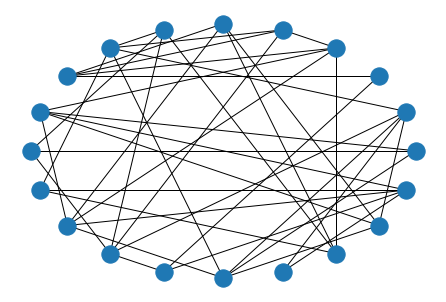

In [5]:
nx.draw_circular(nx.watts_strogatz_graph(20,4,1.0))

In [6]:
nx.average_clustering(nx.watts_strogatz_graph(20,4,1.0))

0.17619047619047618

In [7]:
nx.average_shortest_path_length(nx.watts_strogatz_graph(20,4,1.0))

2.1210526315789475

### Let's generate Figure 2 of the Paper

Generate **Watts-Strogatz model** graphs with the given parameters $n$ (number of nodes) and $k$ (average degree) with different values of $p$ (rewriting probablity). 

The range of $p$ is generated using the function `logspace`, which creates a list of logarithmically-spaced numbers. The range of $p$ is between $10^{-4}$ and $1$.

There are **2** main charactestics that are measured:

1.  **Clustering coefficient $C(p)$:**  This coefficient measures the **degree of clustering** between the nodes. It represents a **local measure** of the graph's connectivity. 
2.  **Average shortest-path length $L(p)$:**  This is the **average of the shortest path length** between every pair of nodes in the graph. This number represent the **global connectiviy** of the graph.



In [8]:
##### Watts-Strogatz model parameters #####

# Number of nodes (graph vertices)
n=1000
# Degree of the initial ring-lattice
k=10
# Resolution (number of different values of p, the rewiring probability)
r = 20

# Generate a set of r logarithmically spaced values of p
p_range=[0] + np.logspace( -4, 0, r ).tolist()

###### For each p, compute the characterstic measures of the Watt-Strogatz model (n,k,p) ####
clustering = []
sp_length  = []

for p in p_range:
    
    # Create a Watts-Strogatz graph
    graph = nx.watts_strogatz_graph( n, k, p )
    
    # Compute the average shortest-path length L(p)
    sp_length.append( nx.average_shortest_path_length( graph ) )

    # Compute the clustering coefficient C(p)
    clustering.append( nx.average_clustering( graph ) )

    print("[p=%.4f]: Clustering coefficient C(p)=%.4f,  Avg shortest path L(p)=%.4f" % (p, clustering[-1], sp_length[-1])) 
    sys.stdout.flush()

[p=0.0000]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0001]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0002]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0003]: Clustering coefficient C(p)=0.6667,  Avg shortest path L(p)=50.4505
[p=0.0004]: Clustering coefficient C(p)=0.6657,  Avg shortest path L(p)=35.2800
[p=0.0007]: Clustering coefficient C(p)=0.6655,  Avg shortest path L(p)=30.2617
[p=0.0011]: Clustering coefficient C(p)=0.6645,  Avg shortest path L(p)=27.5698
[p=0.0018]: Clustering coefficient C(p)=0.6625,  Avg shortest path L(p)=16.8519
[p=0.0030]: Clustering coefficient C(p)=0.6613,  Avg shortest path L(p)=14.5388
[p=0.0048]: Clustering coefficient C(p)=0.6576,  Avg shortest path L(p)=12.0880
[p=0.0078]: Clustering coefficient C(p)=0.6513,  Avg shortest path L(p)=9.5378
[p=0.0127]: Clustering coefficient C(p)=0.6434,  Avg shortest path L(p)=8.2965
[p=0.0207]: Clustering coefficient C(p)=0.

### Step 2

Try the **analytical values** of $C(p)$:


- The **clustering coefficient** has the following analytical value:
$C(p) = C(0)\times (1-p)^{3}  $



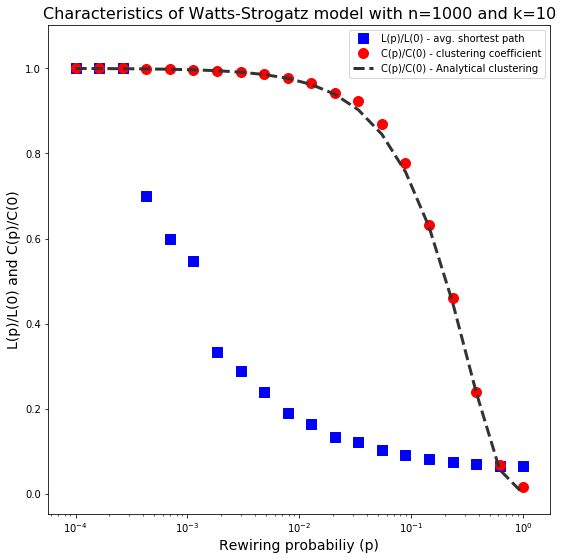

In [9]:

##### Plot L(p)/L(0) and C(p)/C(0) #####
plt.figure(1,figsize=(9,9))

plt.semilogx(p_range[1:] , [L / sp_length[0]  for L in sp_length[1:]]  , 'sb', markersize=10, label='L(p)/L(0) - avg. shortest path')
plt.semilogx(p_range[1:] , [C / clustering[0] for C in clustering[1:]] , 'or', markersize=10, label='C(p)/C(0) - clustering coefficient')
plt.semilogx(p_range[1:] , [(1-p)**3.0 for p in p_range[1:]] , '--', color=[0.2,0.2,0.2], linewidth=3, markersize=12, label='C(p)/C(0) - Analytical clustering')

# Extend the plot region to see the points at both ends
lims = plt.xlim()
plt.xlim([lims[0]*0.9, lims[1]*1.1]) 
lims = plt.ylim()
plt.ylim([lims[0]*0.95, lims[1]*1.05]) 


plt.title( "Characteristics of Watts-Strogatz model with n=%d and k=%d"%(n,k) , fontsize=16)
plt.xlabel( "Rewiring probabiliy (p)" , fontsize=14)
plt.ylabel( "L(p)/L(0) and C(p)/C(0)" , fontsize=14)
plt.legend( loc='best' )
plt.show()